# Frigid Waters

On April 25, 1912, the RMS Titanic, dubbed "Unsinkable," proved that man continues to demonstrate hights of conceit and pomposity that will forever be evidenced in history books.  Over 2000 passengers were awakened in the middle of the night to sights and sounds that they didn't expect.  More than 1500 of them would not live to see another sunset.  "Women and children, first!"  A well known phrase exercised in emergencies for time immemorial.  But were these inherent rules of etiquette and chivalry truly on display that night?  If you were female... if you were a child... were you more likely to find safe harbor in a life boat?  And what constitutes the definition of a child in a time of crisis?  At what age does one in a position of authority take for granted that your status as a child has deemed you of highest import for rescue?  Certainly no one is checking identification before ushering one on to safety, while shunning the next for chivalrous reasons.

And what of other factors?  The Titanic was a large ship, as implied by its name.  Over 2000 people from many, if not all walks of life.  Passengers and crew alike.  The rich on a pleasure cruise of status.  The poor who had scraped everything for a chance to prosper in a new land.  Some cabins were near the deck, or above the deck.  Others were below.  Did the poor child in the bowels of the ship have a better chance of being picked up the next morning by the Carpathia as etiquette might requirE?  Or was it the aristocratic man, full of self importance, who paid a fortune for a room with a view?

Data collected and made available on the [Kaggle][1] website makes it possible to take a peek into the factors that may have played a role in who lived to tell the story, and who lived and died in the story.  Was it the human psyche, the socio-economic factors, the physical or locational factors... or luck?  We will not be able to answer this question with clarity on any individual case, so in that way, this analysis and the conclusions drawn are only tentative.  However, an analysis of a sample of the population that makes up those who awakened to a thud and shudder that fateful morning may point to patterns that would suggest the factors that played into an individual's fate.

This is the goal of this analysis.  Using the data available, a demographic analysis will be performed to get a sense of the makeup of the passengers on that trip.  Where are they from, are they rich or poor, young or old.  Next, an analysis will be made of the factors that may have played a role in the survival of the passengers.  Again, this is a tentative result, as survivability of an individual may have been a result of dumb luck.  However, as patterns may exist in the data, these will be explored.

As a conclusion, any factors that have high degrees of correlation to the survivability of this passenger group will be postulated as having influenced the likelihood of survival, and those factors with lower degrees of correlation will be identified as unlikely to have influenced survival.

[1]: https://www.kaggle.com/c/titanic/data

# Questions

### Demographic Analysis

Initially, demographic analysis will define the passenger population, followed by an analysis on factors that may have contributed to survivability.  Specifically, the following questions will be asked of the data:

1. What is the distribution of socio-economic classes among passengers?
2. What were the passenger counts by point of embarkation?
3. How old was the youngest and oldest passenger in this sample?
4. What was the average age of the passengers represented in this data?
5. Is there a correlation between the socio-economic class of the passenger and the age of the passenger?  In other words, were you more likely, as a minor, to have a place on the Titanic if your family was well off, or were addult passengers with money more likely to travel without children?
6. Is there a relationship between socio-economic class and Port of Embarkation?
7. What was the proportion of male to female passengers on board?

### Survival Analysis

Secondarily, an analysis of possible correlations within the data that might serve as indicators, predictors of a sort, for how likely a passenger was to survive the incident.  Specifically, the following relationships will be explored:

1. Is there a correlation between ticket class (the proxy for socio-economic class) and survival rate?
2. Is there a correlation between gender and survival rate?
4. Is there a correlation between age and survival rate?
5. Is there a correlation between room number (floor level) and mortality? (NOTE: Upon inspection of the data, the room number is largely unavailable within this data set.  Therefore, ticket class will be used as a proxy for this, noting that 3rd class would have been primarily below deck, and 1st and 2nd class would have more ready access to the deck level.)

# Data Aquisition and Exploration

The first step in the process of understanding this data is, of course, the aquisition of this data. In the next cell, the file, described [here][1], will be read into a Pandas data frame.  In addition, this cell will import and include key Python libraries which will be utilized throughout this analysis.  Specifically, matplotlib.pyplot, NumPy, Pandas and seaborn.

[1]: https://www.kaggle.com/c/titanic/data

In [1]:
%pylab inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic-data.csv')

Populating the interactive namespace from numpy and matplotlib


Following will contain functions that may be useful throughout this analysis.

In [51]:
# Below is a function that will take a name formatted as L_Name, F_Name and return a list where the first item
# is the last name and the second item is the first name (i.e. everythign after the comma).  Leading spaces
# are stripped from the content following the comma.

def return_name(name):
    split_name = name.split(',')
    
    return (split_name[0], split_name[1].lstrip())

Let's now take a look at a sample of the data in the file.

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The first thing I notice is that there 3 of the 5 rows of data have no information (NaN) for the cabin number.  I would like to see how prevalent this is throughout the data.  The following code will report on the number of NaN values contained in the data frame.

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Based on the inforamtion above, it is clear that some of my original questions may need to be modified or caveated by the degree of missing data.  Clearly Cabin will not be of use in my analysis, and the sample available for any age demographic information will be reduced significantly.

# Demographic Analysis

Following is a summary discussion and data analysis that will describe the sample of passengers within the [Kaggle][1] data set.  The goal is to gain an understanding of who was on board, figeratively, with respect to age, gender, socio-economic status (indicated by proxy using the class of ticket purchased) and geographic information (indicated by proxy using the boarding location).  This will be done by first processing each of the questions posed above.

[1]: https://www.kaggle.com/c/titanic

### 1.What is the distribution of socio-economic classes among passengers?

Purchasing a ticket for this dream cruise was a holiday expense for some and a lifetime commitment for others.  Depending on your socio-economic status, you also had choices when you planned your expense.  Choices regarding whether you would cruise in the lap of luxury (1st class), more modestly (2nd class).  If you were not able to afford either of these luxuries, your only choice may have been to travel very modestly (3rd class).  This question explores the mix the different classes that were present based on the sample.  This analysis uses Ticket Class (Pclass) as a proxy for this status, as suggested by [Kaggle][1].

[1]: https://www.kaggle.com/c/titanic/data

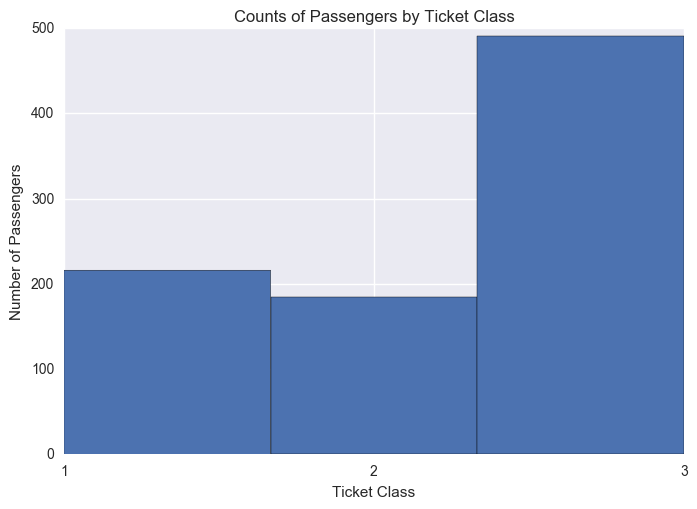

In [4]:
df['Pclass'].hist(bins=3)
plt.xticks(range(1,4))
plt.xlabel("Ticket Class")
plt.ylabel("Number of Passengers")
plt.title("Counts of Passengers by Ticket Class");

As seen in the data above, more than 50% of the passengers purchased 3rd class tickets.  This would suggest that, although the Titanic had plenty of luxury and opulence, much of which is recalled due to the fame and fortune of the 1st class passengers, the vessel served more than a luxury purpose.  It was a people mover, and had its fair share of commoners on board.

### 2.What were the passenger counts by point of embarkation?

The purpose of this question is to get a view of the geographic diversity of the passengers.

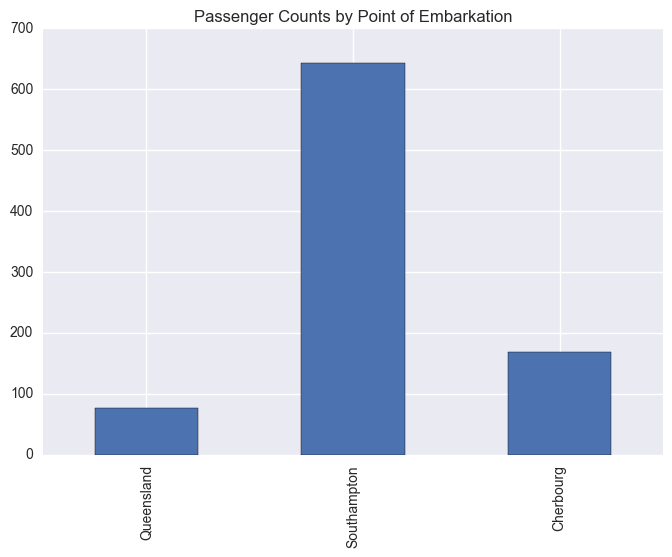

In [18]:
from collections import Counter

# First I will replace the codes C, Q and S with the embarkation points that they represent.

letter_counts = {}

letter_counts = Counter(df['Embarked'].replace(['C','Q','S'],['Cherbourg','Queensland','Southampton']).dropna())

df2 = pd.DataFrame.from_dict(letter_counts, orient='index')
df2.plot(kind='bar', legend=False, title='Passenger Counts by Point of Embarkation');

From this, it is clear the most passengers boarded in Southampton.  According to [Wikipedia]:[1], Southampton was the original port of departure, followed by Cherbourg (France) and then Queensland (Ireland).  The relevance of this data point is not clear at this time, and may prove irrelevant to the analysis in the end.  However, the value of understanding the data can not be under estimated and, at a minimum, this gives additional insight into the nationality of the passengers.

[1]: https://en.wikipedia.org/wiki/RMS_Titanic

### 3.How old was the youngest and oldest passenger in this sample?

To get an idea of the ages of the passengers, below we will look at a few views of this information.  First, a simple view just showing the oldest and youngest represented by this data.

In [60]:
youngest = df['Age'].dropna().min()
youngest_row = df['Age'].dropna().argmin()
youngest_name = df['Name'][youngest_row]

oldest = df['Age'].dropna().max()
oldest_row = df['Age'].dropna().argmax()
oldest_name = df['Name'][oldest_row]

if youngest < 1:
    youngest_str = "approximately " + str(int(youngest * 12)) + " months"
elif youngest % 1 <> 0:
    youngest_str = "approximately" + str(int(youngest)) + "years"
else:
    youngest_str = str(int(youngest)) + "years"

if oldest < 1:
    oldest_str = "approximately " + str(int(oldest * 12)) + " months"
elif oldest % 1 <> 0:
    oldest_str = "approximately " + str(int(oldest)) + "years"
else:
    oldest_str = str(int(oldest)) + " years"
    
print("\n\nThe youngest passenger in the sample, {}, was {} old.\n".format(return_name(youngest_name)[1] + " " + \
                                                                return_name(youngest_name)[0],youngest_str))
print("The oldest passenger in the sample, {}, was {} old.\n\n".format(return_name(oldest_name)[1] + " " + \
                                                                return_name(oldest_name)[0],oldest_str))



The youngest passenger in the sample, Master. Assad Alexander Thomas, was approximately 5 months old.

The oldest passenger in the sample, Mr. Algernon Henry Wilson Barkworth, was 80 years old.




Such a wide range of life experience.  Although this is the demographic review section, the inclusion of the name in the above query makes this data more personal, and I think it is appropriate to inquire briefly at this stage as to the details of these two individuals and whether they were counted among the survivors.

In [63]:
df.iloc[youngest_row]

PassengerId                                804
Survived                                     1
Pclass                                       3
Name           Thomas, Master. Assad Alexander
Sex                                       male
Age                                       0.42
SibSp                                        0
Parch                                        1
Ticket                                    2625
Fare                                    8.5167
Cabin                                      NaN
Embarked                                     C
Name: 803, dtype: object

In [64]:
df.iloc[oldest_row]

PassengerId                                     631
Survived                                          1
Pclass                                            1
Name           Barkworth, Mr. Algernon Henry Wilson
Sex                                            male
Age                                              80
SibSp                                             0
Parch                                             0
Ticket                                        27042
Fare                                             30
Cabin                                           A23
Embarked                                          S
Name: 630, dtype: object

Despite the terrible tragedy of that night, it is comforting to see that our first introduction to the individuals in our analysis bear a happy ending.  Five month old, 3rd class passenger, Master Thomas who boarded in Cherbourg and 80 year old, 1st class passenger, Mr. Wilson who boarded in Southampton both escaped the grips of the cold sea that night.

### 4.What was the average age of the passengers represented in this data?

So, now we know the oldest and youngest and thus have an idea for the vast difference in ages present, but for a more blended view of the ages of the passengers, we will take a look at some additional statistics.  (While originally posing questions about the data, I focused this question on the mean, but other data seems relevant as well.)

Following is a set of statistical information on the ages of the passengers in the sample:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


And now for a look at the boxplot showing the range of ages.



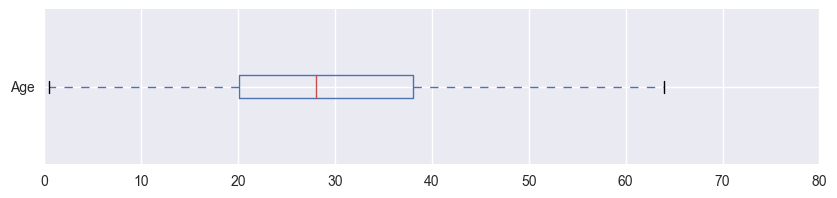

In [84]:
print("Following is a set of statistical information on the ages of the passengers in the sample:\n{}\n\n".format(df['Age'].describe()))
print("And now for a look at the boxplot showing the range of ages.\n")

df['Age'].plot(kind='box', vert=False, figsize=(10,2));

A new picture arises from this information.  While Mr. Wilson was 80 years young, the data shows that he was not joined with a large proportion of passengers that shared his age.

#### Mean
The average age of passengers was 29 years old.  Knowing that this was viewed as a trip of a lifetime, it is a bit surprising that individuals of such a young age had the means with which to endulge.

#### Standard Deviation
We see from the above data that the standard deviation of ages is 14.5 years.  Taking the rule of thumb that 95% of a sample should fall within approximately 2 standard deviations of the mean, we can assert that 95% of the passengers were likely between 15 and 45 years of age.

#### Median
The age representing the 50 percentile is 28 years old.  This is further indication that most of the passengers were significantly younger than Mr. Wilson.

### 5. Is there a correlation between the socio-economic class of the passenger and the age of the passenger?

Up to this point, we have been focused primarily on a single data point.  With this question, we will start to draw comparisons between multiple demographic points to see more clearly what the passenger makeup looked like.

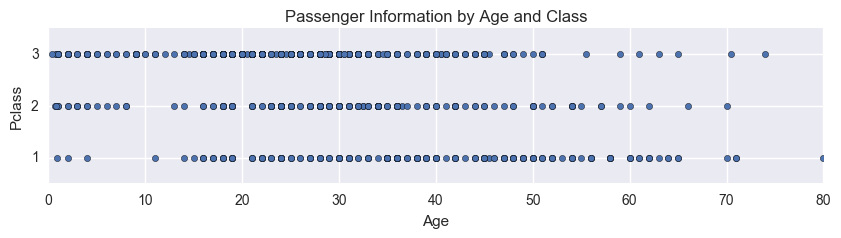

In [114]:
df.plot(x='Age',y='Pclass',kind='scatter', yticks=(1,2,3), title='Passenger Information by Age and Class', \
           figsize=(10,2), xlim=(0,80));

An interesting pattern is starting to shape up.  This is not all too unexpected, but is now shown visually.

The first conclusion that appears to be valid from the chart above is that, the majority of the passengers who could afford a 1st class ticket were more likely to be over the age of 20, whereas the passengers who purghased 3rd class tickets were more evenly distributed above and below that age.

The next conclusion is that, if you were traveling 1st class, you were less likely to bring your children along (based on age), or, I suppose you may have been less likely to have children.  Regardless of the reason, the data shows that the vast majority of passengers under the age of 10 were not traveling 1st class, and the same holds true for passengers under 20.

### 6.Is there a relationship between socio-economic class and Port of Embarkation?

Again, in the interest of understanding the data, I would like to explore where the majority of the passengers embarked by class.  As the majority of the passengers embarked in Southampton (from our data above), I would expect that this will be the majority of all classes.

KeyError: 'Embarked'

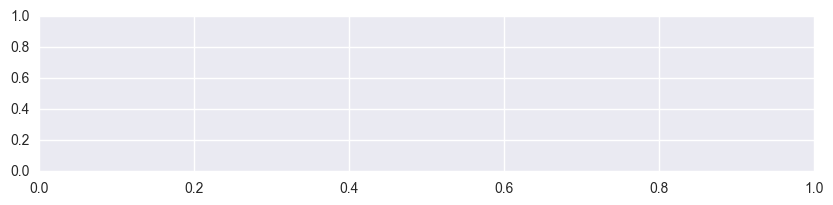

In [126]:
x_map = df.Embarked.map({'C':0,'S':1,'Q':2})
s_map = ()

df.plot(x='Embarked', y='Pclass',kind='scatter', yticks=(1,2,3), title='Passenger Information by Age and Class', \
           figsize=(10,2), xlim=(0,80)); #, s=df.count());

### 7.What was the proportion of male to female passengers on board?

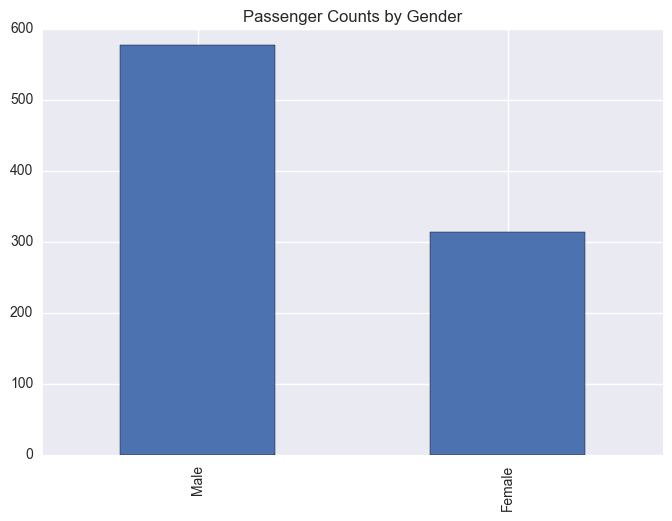

In [160]:
sex_counts = Counter(df['Sex'].replace(['male','female'],['Male','Female']).dropna())

df2 = pd.DataFrame.from_dict(sex_counts, orient='index')
df2.plot(kind='bar', legend=False, title='Passenger Counts by Gender');

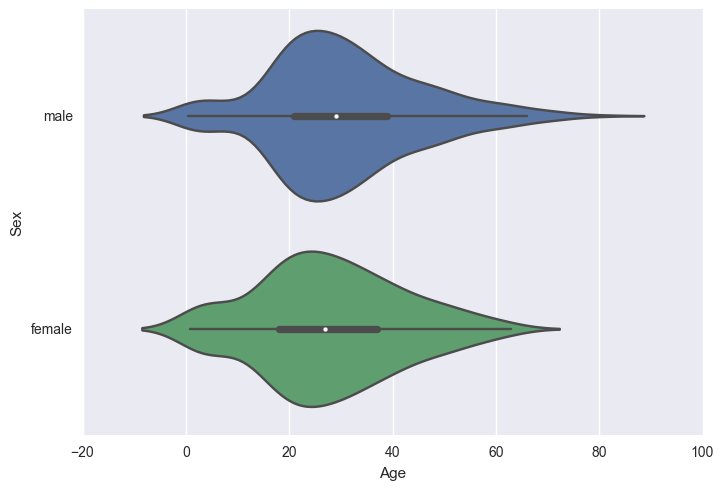

In [163]:
sns.violinplot(y='Sex', x='Age', data=df, title="Age Distribution by Gender");

Within our sample of passenger data, male outnumbered female by almost a 2-to-1 margin.  When combined with the kernel density you can get a sense of the age distribution between the genders as well.

## Demographics Conclusion

In summary, what we see is the following:
1. Majority Male passengers.
2. Majority of passengers aged 20-30 years.
3. Majority of passengers in 3rd class.
4. Majority of passengers boarded in Southampton.
5. Very few 1st class children and relatively few 2nd class children.

This demographic information paints a picture of what it would have been like to walk the deck of the Titanic on her maiden voyage.  As you look to your right and left at the passengers surrounding you, using this data, you can get a sense of the people you would see.  Next, we are going to take a look at how that fateful night affected different groups of these passengers.

# Survival Analysis

Many different factors may have played into the survivability of this disaster.  Everyone has heard, "women and children first."  Was it true that night?  Or did your social and economic status serve to buy your way to safety?  Or was it just luck based on the class of ticket you purchased... 1st class having views and being above deck when the flooding began, and 3rd class being below deck.  This analysis will look for correlations between these factors.

### 1.Is there a correlation between ticket class (the proxy for socio-economic class) and survival rate?

In [169]:
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    
    x_std = x.std(ddof=0)
    y_std = y.std(ddof=0)
    
    x_mean = x.mean()
    y_mean = y.mean()
    
    x_dist_mean = x - x_mean
    y_dist_mean = y - y_mean
    
    x_std_units = x_dist_mean / x_std
    y_std_units = y_dist_mean / y_std
    
    x_y_prod = x_std_units * y_std_units
    
    return x_y_prod.mean()

tkt_class = df['Pclass']
survival = df['Survived']

print correlation(tkt_class, survival)


-0.338481035961


### 2.Is there a correlation between gender and survival rate?

In [170]:
def 

TypeError: string indices must be integers, not str

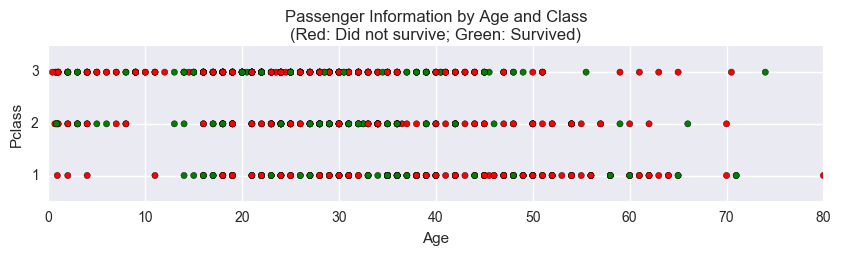

In [167]:
color_map = df.Survived.map({0:'red',1:'green'})
df.plot(x='Age',y='Pclass',kind='scatter', yticks=(1,2,3), title='Passenger Information by Age and Class\n(Red: Did not survive; Green: Survived)', \
           figsize=(10,2), xlim=(0,80), c=color_map);

### 3.Is there a correlation between age and survival rate?


### 4.Is there a correlation between room number (level) and mortality (level on vertical, age on horizontal, color shows mortality)

age/class/survived

Sources:
* The data on Titanic passengers was obtained from the [Udacity][1] Data Analysis Nano-degree Program, Intro to Data Analysis course.  
* The original data source was [Kaggle][2].
* The [Markdown Cheatsheet][3] by *Adam Pritchard* was used extensively as a reference during documentation.
* Header image is public image:
George Arents Collection, The New York Public Library. "The "Titanic"." The New York Public Library Digital Collections. <http://digitalcollections.nypl.org/items/510d47e2-c884-a3d9-e040-e00a18064a99>
* Historical reference for basic dates and figures: [history.com][4]
* Historical reference: [wikipedia.com][5]


[1]: http://www.udacity.com
[2]: https://www.kaggle.com/c/titanic/data
[3]: https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#lists
[4]: http://www.history.com/topics/titanic
[5]: https://en.wikipedia.org/wiki/RMS_Titanic